### Hyperparameters
Hyperparameters are parameters whose values control the learning process and determine the values of model parameters that a learning algorithm ends up learning. The prefix ‘hyper_’ suggests that they are ‘top-level’ parameters that control the learning process and the model parameters that result from it.

## Hyper Parameter Testing

1. GridSearch
2. RandomSearch

### Code:

In [29]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

dataset = pd.read_csv('diabetes.csv')

X = dataset.drop('Outcome', axis=1).to_numpy() 
y = dataset.Outcome.to_numpy()

# train_test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=99)

# Feature Scaling
scaler =StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Hyper parameter space

In [30]:
hyperparameter = {
    "penalty":['l1','l2'],
    "solver":['liblinear'],
    "class_weight":[None,'balanced'],
    "max_iter":[50,100,200,500]
}


In [31]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

In [32]:
model = LogisticRegression()

### Grid Search

In [33]:
grid_search  = GridSearchCV(estimator=model, param_grid=hyperparameter, cv=3)

In [34]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=LogisticRegression(),
             param_grid={'class_weight': [None, 'balanced'],
                         'max_iter': [50, 100, 200, 500],
                         'penalty': ['l1', 'l2'], 'solver': ['liblinear']})

In [35]:
grid_search.best_params_

{'class_weight': None, 'max_iter': 50, 'penalty': 'l2', 'solver': 'liblinear'}

In [36]:
grid_search.best_score_

0.7687629523354057

In [37]:
from sklearn.metrics import f1_score, make_scorer, confusion_matrix
f1_scorer = make_scorer(f1_score)

In [38]:
grid_search  = GridSearchCV(estimator=model, param_grid=hyperparameter, cv=3, scoring=f1_scorer)

In [39]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=LogisticRegression(),
             param_grid={'class_weight': [None, 'balanced'],
                         'max_iter': [50, 100, 200, 500],
                         'penalty': ['l1', 'l2'], 'solver': ['liblinear']},
             scoring=make_scorer(f1_score, response_method='predict'))

In [40]:
grid_search.best_params_

{'class_weight': 'balanced',
 'max_iter': 50,
 'penalty': 'l1',
 'solver': 'liblinear'}

In [41]:
grid_search.best_score_

0.664810834705201

In [42]:
model.set_params(**grid_search.best_params_)

LogisticRegression(class_weight='balanced', max_iter=50, penalty='l1',
                   solver='liblinear')

In [43]:
model.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', max_iter=50, penalty='l1',
                   solver='liblinear')

In [44]:
model.score(X_test,y_test)

0.7792207792207793

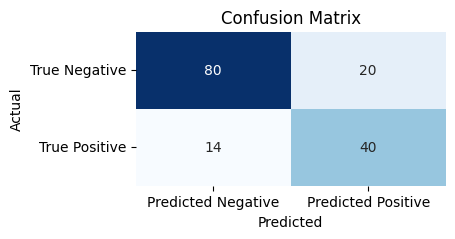

In [45]:
# Plot the confusion matrix using Seaborn
plt.figure(figsize=(4, 2))
sns.heatmap(confusion_matrix(y_test, model.predict(X_test)), annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['True Negative', 'True Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()